In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import sys 
sys.path.append('/home/jaime/Desktop/hippocampus/files')
import file_management

current_folder = os.getcwd()
folder = os.path.join(current_folder, "folder39")

In [2]:
keys = ["pyr","bas","olm","cck"]
data = dict.fromkeys(keys)
for key in keys:
    data[key]= [ [] for i in range(21)]
for i in range(21):
    for j in range(2):
        for k in range(2): 
            aux = os.path.exists(os.path.join( folder, f"spikes_only_ca1_{i}_{j}_{k}.lzma" ))
            if not aux:
                print(i,j,k)
#             aux = file_management.load_lzma( os.path.join( folder, f"spikes_only_ca1_{j}_{k}_{i}.lzma" ))["ca1"]
#             for key in keys: 
#                 data[key][i].append( aux[key] )

In [3]:
keys = ["pyr","bas","olm","cck"]
data = dict.fromkeys(keys)
for key in keys:
    data[key]= [ [] for i in range(21)]
for i in range(21):
    for j in range(2):
        for k in range(2): 
            aux = file_management.load_lzma( os.path.join( folder, f"spikes_only_ca1_{i}_{j}_{k}.lzma" ))["ca1"]
            for key in keys: 
                data[key][i].append( aux[key] )

(2000.0, 3000.0)

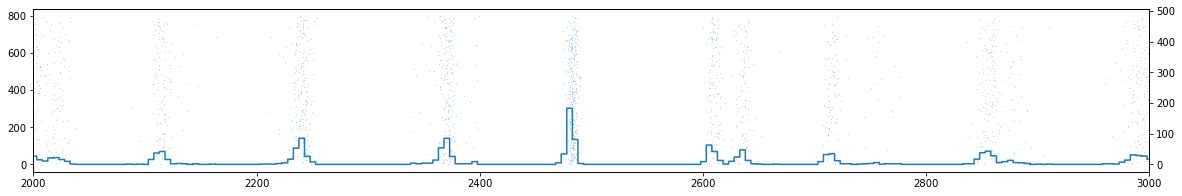

In [4]:
fig, ax = plt.subplots(figsize=(20,3))
spikes = data["pyr"][0][0]["tvec"]
ax.plot(data["pyr"][0][0]["tvec"], data["pyr"][0][0]["idvec"],'o',markersize=.1)
time_binned = np.arange(0,4000,5)
counts, bins = np.histogram( spikes, bins=time_binned)
bins = bins[1:]-np.diff(bins)[0]//2 
ax2 = ax.twinx()
ax2.step(bins, counts)
ax.set_xlim([2000,3000])

In [5]:
zeros = [50 + 125*i for i in range(39)]

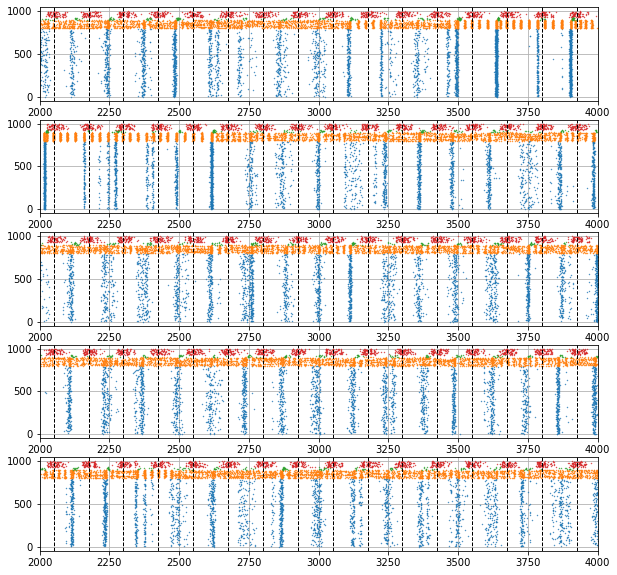

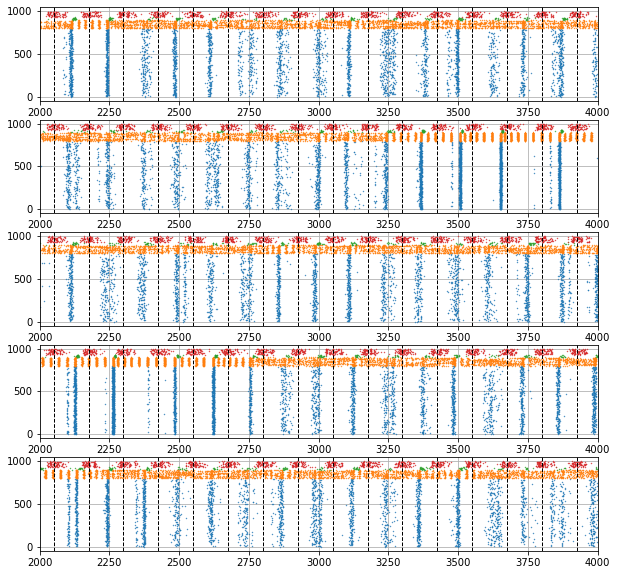

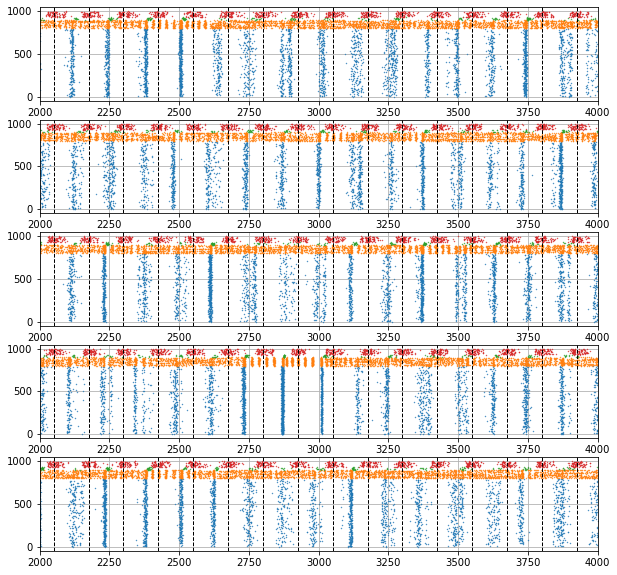

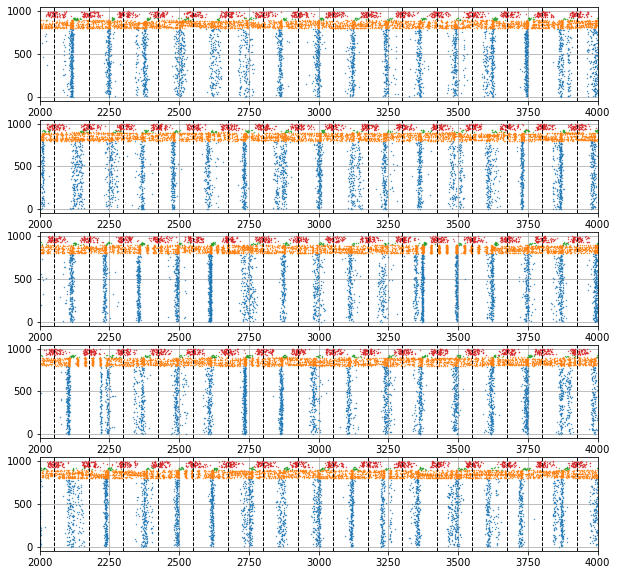

In [6]:
for k in range(4):
    fig, axs = plt.subplots(5,1,figsize=(10,10))
    for ii,i in enumerate(range(0,21,5)): 
        axs[ii].plot(data["pyr"][i][k]["tvec"], data["pyr"][i][k]["idvec"],'o',markersize=.4)
        axs[ii].plot(data["bas"][i][k]["tvec"], data["bas"][i][k]["idvec"],'o',markersize=.4)
        axs[ii].plot(data["olm"][i][k]["tvec"], data["olm"][i][k]["idvec"],'o',markersize=.4)
        axs[ii].plot(data["cck"][i][k]["tvec"], data["cck"][i][k]["idvec"],'o',markersize=.4)
        axs[ii].set_xlim([2000,4000])
        for h in zeros:
            axs[ii].axvline(h,color="black",linestyle="--",linewidth=1)
        axs[ii].grid(True)

In [7]:
time_binned = np.arange(0,4000,2.5)*1e-3
dt = np.diff(time_binned)[0]
ftmatrix = [ [] for i in range(21)]
for i in range(21):
    #fig, ax = plt.subplots(figsize=(20,3))
    spikes = data["bas"][i][0]["tvec"]*1e-3
    ax.plot(spikes, data["bas"][i][0]["idvec"],'o',markersize=.1)
    counts, bins = np.histogram( spikes, bins=time_binned)
    bins = bins[1:]-np.diff(bins)[0]//2 
    # ax2 = ax.twinx()
    w = (bins>0.5) & (bins<4)
    # ax2.step(bins[w], counts[w])
    # ax.set_xlim([1,3])
    
    c0 = (counts[w]-counts[w].mean())/(counts[w].std())
    ft = np.fft.fft( c0, n = 2048)
    n = len( counts [w] )
    ft = np.abs( ft[:n//2] )**2
    fr = np.fft.fftfreq(n, dt)[:n//2]
    ftmatrix[i] = ft[fr<100]
ftmatrix = np.array(ftmatrix)

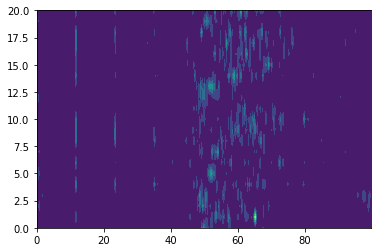

In [8]:
plt.contourf( fr[fr<100], np.arange(21), ftmatrix) 

In [9]:
isi =dict.fromkeys(["pyr","bas"])
for key in isi.keys(): 
    isi[key] = [ [] for i in range(21) ]
    
key = "bas"
isi_bas = True
if isi_bas:
    for i in range(21):
        for k in range(4):
            for l in range(800,900):
                isi[key][i].append( np.diff( data[key][i][k]["tvec"][ data[key][i][k]["idvec"] == l ]) )
        isi[key][i] = np.concatenate( isi[key][i] )
  
key = "pyr"
for i in range(21):
    for k in range(4):
        for l in range(800):
            isi[key][i].append( np.diff( data[key][i][k]["tvec"][ data[key][i][k]["idvec"] == l ]) )
    isi[key][i] = np.concatenate( isi[key][i] )

<ipython-input-10-3da2ff13b261>:24: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh( ibins, np.arange(21), np.log(isi_cmap[key]) ,shading="auto")
<ipython-input-10-3da2ff13b261>:31: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh( fbins, np.arange(21), np.log(freq_cmap[key]), shading="auto")


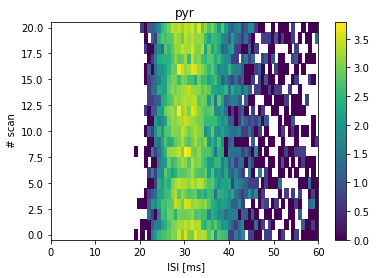

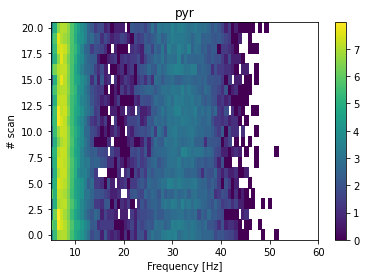

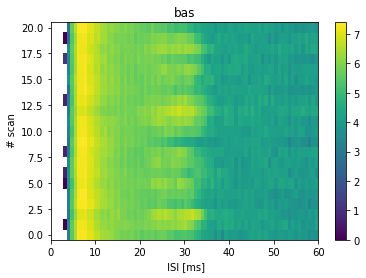

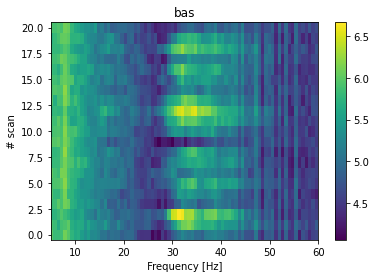

In [10]:
ibins = np.linspace(0,60,81)
fbins = np.linspace(5,60,81)
isi_cmap = dict.fromkeys(["pyr","bas"])
freq_cmap = dict.fromkeys(["pyr","bas"])
for key in ["pyr","bas"]:
    isi_cmap[key] = []
    freq_cmap[key] = []

for key in ["pyr","bas"]:
    for ii, i in enumerate(range(21)): 
        y,xi = np.histogram( isi[key][i], bins = ibins)     
        isi_cmap[key].append( y )
        y,xf = np.histogram( 1e3/isi[key][i], bins = fbins)     
        freq_cmap[key].append( y )

    freq_cmap[key] = np.array( freq_cmap[key] )
    isi_cmap[key]  = np.array( isi_cmap[key] )
    
ibins = ibins[1:]-np.diff(ibins)/2
fbins = fbins[1:]-np.diff(fbins)/2

for key in ["pyr","bas"]:
    plt.figure()
    plt.pcolormesh( ibins, np.arange(21), np.log(isi_cmap[key]) ,shading="auto")
    plt.xlabel(" ISI [ms]")
    plt.ylabel(" # scan")
    plt.title(key)
    plt.colorbar() 

    plt.figure()
    plt.pcolormesh( fbins, np.arange(21), np.log(freq_cmap[key]), shading="auto")
    plt.xlabel(" Frequency [Hz] ")
    plt.ylabel(" # scan ")
    plt.title(key)
    plt.colorbar()

Text(0.5, 0, 'Frequency basket [Hz]')

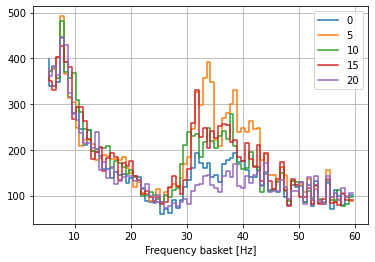

In [11]:
for i in range(0,21,5):
    plt.step(fbins,freq_cmap["bas"][i], label=i)
plt.grid(True)
plt.legend(loc="best")
plt.xlabel("Frequency basket [Hz]")

# Phase

In [12]:
cells = ["pyr","bas","olm","cck"]
phase = dict.fromkeys(cells)
phase_hist = dict.fromkeys(cells)
phase_density = dict.fromkeys(cells)
bins = np.arange(0,361,5)
bins_centered = bins[1:]-np.diff(bins)[0]//2

for cell in cells: 
    phase[cell] = [ [] for i in range(21) ]
    phase_hist[cell] = [ [] for i in range(21) ]  
    phase_density[cell] = [ [] for i in range(21) ]

for cell in cells:
    for i in range(21): 
        for k in range(4):
            phase[cell][i].append( np.mod(data[cell][i][k]["tvec"][data[cell][i][k]["tvec"]>500]-50,125)*360/125)
        phase[cell][i] = np.concatenate(phase[cell][i])
        
        phase_hist[cell][i], bins = np.histogram(phase[cell][i], bins=bins)
        phase_density[cell][i], bins = np.histogram( phase[cell][i], bins=bins, density=True)

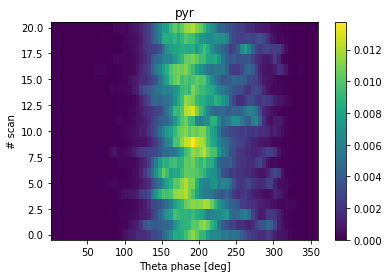

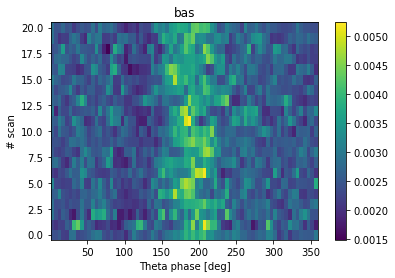

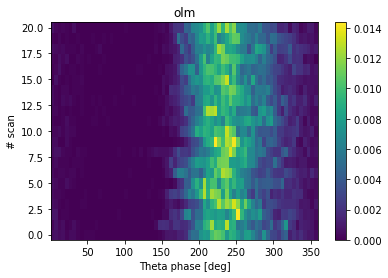

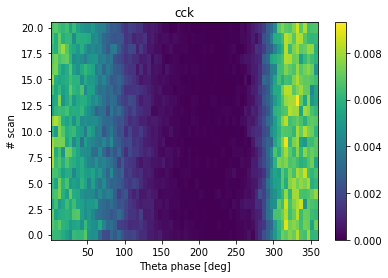

In [13]:
for cell in cells:
    plt.figure() 
    plt.pcolormesh( bins_centered, np.arange(21),phase_density[cell], shading="auto")
    plt.colorbar()
    plt.title(cell)
    plt.xlabel("Theta phase [deg]")
    plt.ylabel(" # scan ")
    

# LFP

In [14]:
lfp = False
if lfp:
    data = [ [ [] for k in range(5)] for i in range(21)]
    for i in range(21):
        for j in range(2):
            for k in range(2): 
                aux = file_management.load_lzma( os.path.join( folder, f"lfp_only_ca1_{i}_{j}_{k}.lzma" ))["ca1"]
                for l in range(5):
                    data[i][l].append(aux[l])
    data = np.array(data)

In [15]:
if lfp:
    dt = 0.002
    n = np.shape(data)[-1]
    time = np.arange(0,n*dt,dt)

    for ii,i in enumerate(range(0,21,5)): 
        fig, axs = plt.subplots(5,1,figsize=(10,10))
        for l in range(5):
            axs[l].plot(time,data[i,l,0])

In [16]:
keys = ["pyr","bas","olm","cck"]
data = dict.fromkeys(keys)
for key in keys:
    data[key]= [ [] for i in range(21)]
for i in range(21):
    for j in range(2):
        for k in range(2): 
            aux = file_management.load_lzma( os.path.join( folder, f"spikes_only_ca1_{i}_{j}_{k}.lzma" ))["ca1"]
            for key in keys: 
                data[key][i].append( aux[key] )

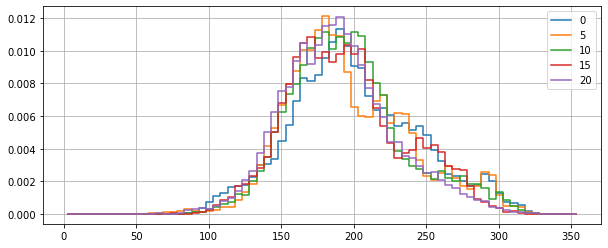

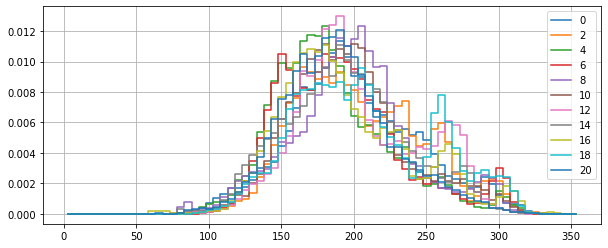

In [17]:
# output phase 
phase_pyr = [ [] for i in range(21)]

for i in range(21):
    for k in range(4):
        aux = data["pyr"][i][k]["tvec"]
        w = aux > 500
        phase_pyr[i].append( np.mod( aux[w]-50, 125)*360/125 ) 
    phase_pyr[i] = np.concatenate( phase_pyr[i] )

binphase = np.arange(0,360,5)
plt.figure(figsize=(10,4))
for i in range(0,21,5):
    counts, bins = np.histogram( phase_pyr[i], bins=binphase, density="True" )
    bins = bins[1:]-np.diff(bins)[0]//2
    plt.step( bins, counts,label=i)
plt.legend(loc="best")
plt.grid(True)
#plt.xlim([0,100])

binphase = np.arange(0,360,5)
plt.figure(figsize=(10,4))
for i in range(0,21,2):
    counts, bins = np.histogram( phase_pyr[i], bins=binphase, density="True" )
    bins = bins[1:]-np.diff(bins)[0]//2
    plt.step( bins, counts,label=i)
plt.legend(loc="best")
plt.grid(True)
#plt.xlim([0,100])

# binphase = np.arange(0,360,5)
# for i in range(0,21,1):
#     plt.figure(figsize=(10,4))
#     counts, bins = np.histogram( phase_pyr[i], bins=binphase, density="True" )
#     bins = bins[1:]-np.diff(bins)[0]//2
#     plt.step( bins, counts,label=i)
#     plt.legend(loc="best")
#     plt.grid(True)
#     plt.axvline(200)
# #plt.xlim([0,100])

In [18]:
# alternative metric of the pyr phase 
# only I consider the first spike of the bursting (assuming that if it fires twice is bursting...)

In [19]:
phase_pyr = [ [] for i in range(21)]
zeros = np.array(zeros)
zeros_aux = zeros[(zeros>=500) & (zeros<=4000)]
for i in range(21):
    for k in range(4):
        spikes  = data["pyr"][i][k]["tvec"]
        neurons = data["pyr"][i][k]["idvec"]
        w = (spikes >= 550)
        spikes = spikes[w]
        neurons = neurons[w]
        for t1,t2 in zip(zeros_aux[:-1],zeros_aux[1:]):
            ww = (spikes>=t1) & (spikes<t2)
            #print( spikes[ww] )
            #print( neurons[ww])
            _, index = np.unique(neurons[ww],return_index=True)
            phase_pyr[i].append( np.mod( spikes[ww][index]-50, 125)*360/125 ) 
    phase_pyr[i] = np.concatenate( phase_pyr[i] )

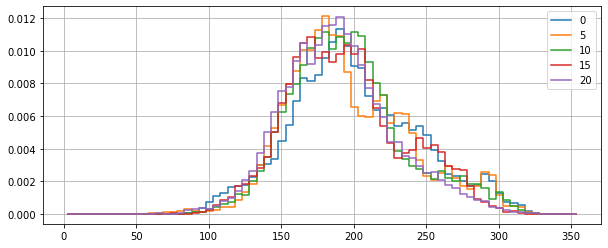

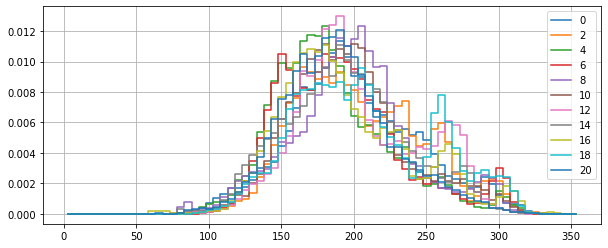

In [20]:
# output phase 
phase_pyr = [ [] for i in range(21)]

for i in range(21):
    for k in range(4):
        aux = data["pyr"][i][k]["tvec"]
        w = aux > 500
        phase_pyr[i].append( np.mod( aux[w]-50, 125)*360/125 ) 
    phase_pyr[i] = np.concatenate( phase_pyr[i] )

binphase = np.arange(0,360,5)
plt.figure(figsize=(10,4))
for i in range(0,21,5):
    counts, bins = np.histogram( phase_pyr[i], bins=binphase, density="True" )
    bins = bins[1:]-np.diff(bins)[0]//2
    plt.step( bins, counts,label=i)
plt.legend(loc="best")
plt.grid(True)
#plt.xlim([0,100])

binphase = np.arange(0,360,5)
plt.figure(figsize=(10,4))
for i in range(0,21,2):
    counts, bins = np.histogram( phase_pyr[i], bins=binphase, density="True" )
    bins = bins[1:]-np.diff(bins)[0]//2
    plt.step( bins, counts,label=i)
plt.legend(loc="best")
plt.grid(True)
#plt.xlim([0,100])

In [21]:
# measure of the CFC 
from signal_analysis import *

In [22]:
lfp = True
if lfp:
    data = [ [ [] for k in range(5)] for i in range(21)]
    for i in range(21):
        for j in range(2):
            for k in range(2): 
                aux = file_management.load_lzma( os.path.join( folder, f"lfp_only_ca1_{i}_{j}_{k}.lzma" ))["ca1"]
                for l in range(5):
                    data[i][l].append(aux[l])
    data = np.array(data)
nlen = np.shape(data)[-1]

In [23]:
# fs = 1/dt
# time = np.arange(0,np.shape(data)[-1]*dt, dt)
# w = time > 0.5
# example = data[10,1,0,w]
# example_filtered = lowpass_filter(example,fs=fs, norder=4,f_range=(100))
# plt.figure(figsize=(20,3))
# plt.plot(time[w],data[10,1,0][w],'o-')
# plt.plot(time[w],example_filtered,'o-')
# plt.ylim([0.001,0.03])

In [24]:
dt = 0.002
fs = 1/dt
time = np.arange(0,nlen*dt, dt)
w = time > 0.5
dims = np.shape(data[:,:,:,w])
data_filtered = np.zeros(dims)
power = dict.fromkeys(["theta","gamma"])
power["theta"] = np.zeros(dims[:-1])
power["gamma"] = np.zeros(dims[:-1])
coherence = dict.fromkeys(["lfp","currents"])
coherence["lfp"] = [ [ [] for k in range(5)] for i in range(21) ]
# coherence["currents"] = [ [ [] for k in range(5)] for i in range(21) ]
for i in range(dims[0]):
    for j in range(dims[1]):
        for k in range(dims[2]):
            data_filtered[i,j,k] = lowpass_filter(data[i,j,k,w],fs=fs, norder=4, f_range=(100) )
            x = (data_filtered[i,j,k]-data_filtered[i,j,k].mean())/data_filtered[i,j,k].std()
            frl, pxx  = scipy.signal.csd( x, x, fs=fs, window="hann", nfft=512, nperseg=200, noverlap=175)
            df = np.diff(frl)[0]
            wtheta = (frl>=3) & (frl<=12)
            wgamma = (frl>=30) & (frl<=100)
            power["theta"][i,j,k] = np.sum( pxx[wtheta] )*df
            power["gamma"][i,j,k] = np.sum( pxx[wgamma] )*df
            coherence["lfp"][i][j].append( pxx )

In [25]:
power["theta_std"]  = np.std(  power["theta"], axis=2 )/np.sqrt( np.shape(power["theta"])[2] )
power["theta_mean"] = np.mean( power["theta"], axis=2 )
power["gamma_std"]  = np.std(  power["gamma"], axis=2 )/np.sqrt( np.shape(power["gamma"])[2] )
power["gamma_mean"] = np.mean( power["gamma"], axis=2 ) 

coherence["lfp_std"] = np.std(coherence["lfp"],axis=2 )/np.sqrt( np.shape(power["gamma"])[2] )
coherence["lfp"] = np.mean(coherence["lfp"],axis=2)


Text(0, 0.5, 'Power [a.u.]')

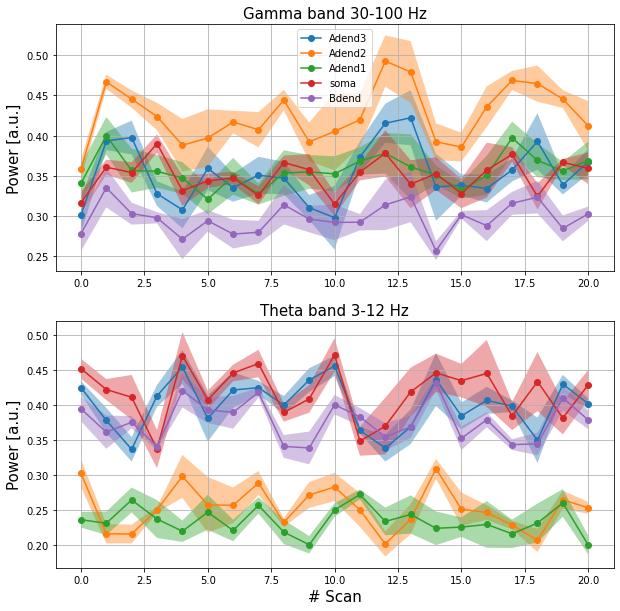

In [26]:
x = np.arange(21)
labels = ["Adend3","Adend2","Adend1","soma","Bdend"]

fig, axs = plt.subplots(2,1,figsize=(10,10))
for i,label in enumerate(labels):
    mu, std = power["gamma_mean"][:,i], power["gamma_std"][:,i]
    axs[0].plot(x, mu,'o-',label=label)
    axs[0].fill_between(x, mu-std,mu+std, alpha=.4)
for i,label in enumerate(labels):
    mu, std = power["theta_mean"][:,i], power["theta_std"][:,i]
    axs[1].plot( x, mu,'o-' )
    axs[1].fill_between(x,mu-std, mu+std,alpha=.4)
axs[0].set_title("Gamma band 30-100 Hz",fontsize=15)
axs[1].set_title("Theta band 3-12 Hz",fontsize=15)
axs[0].grid(True)
axs[1].grid(True)
axs[0].legend(loc="best")
axs[1].set_xlabel("# Scan",fontsize=15)
axs[1].set_ylabel("Power [a.u.]",fontsize=15)
axs[0].set_ylabel("Power [a.u.]",fontsize=15)

# currents

In [27]:
dt = 0.001
fs = 1/dt
i,j,k=0,0,0
aux = file_management.load_lzma( os.path.join( folder, f"syn_only_ca1_{i}_{j}_{k}.lzma" ))
data = dict.fromkeys(aux.keys())

for key in data.keys():
    data[key] = [ [] for i in range(21)]
for i in range(21):
    for j in range(2):
        for k in range(2): 
            aux = file_management.load_lzma( os.path.join( folder, f"syn_only_ca1_{i}_{j}_{k}.lzma" ))
            for key in data.keys():
                data[key][i].append( aux[key].values ) 
                
for key in data.keys(): 
    data[key] = np.mean(data[key],axis=1)
    

In [28]:
labels = ["Adend3","Adend2","Adend1","soma","Bdend"]
currents = dict.fromkeys(labels)
for label in labels: 
    currents[label] = []
    for key in data.keys(): 
        if label in key: 
            currents[label].append(key)

<ipython-input-29-426b7361cbbf>:36: RuntimeWarning: invalid value encountered in true_divide
  x = (total_current-total_current.mean())/total_current.std()
<ipython-input-29-426b7361cbbf>:36: RuntimeWarning: invalid value encountered in true_divide
  x = (total_current-total_current.mean())/total_current.std()
<ipython-input-29-426b7361cbbf>:36: RuntimeWarning: invalid value encountered in true_divide
  x = (total_current-total_current.mean())/total_current.std()
<ipython-input-29-426b7361cbbf>:36: RuntimeWarning: invalid value encountered in true_divide
  x = (total_current-total_current.mean())/total_current.std()
<ipython-input-29-426b7361cbbf>:36: RuntimeWarning: invalid value encountered in true_divide
  x = (total_current-total_current.mean())/total_current.std()


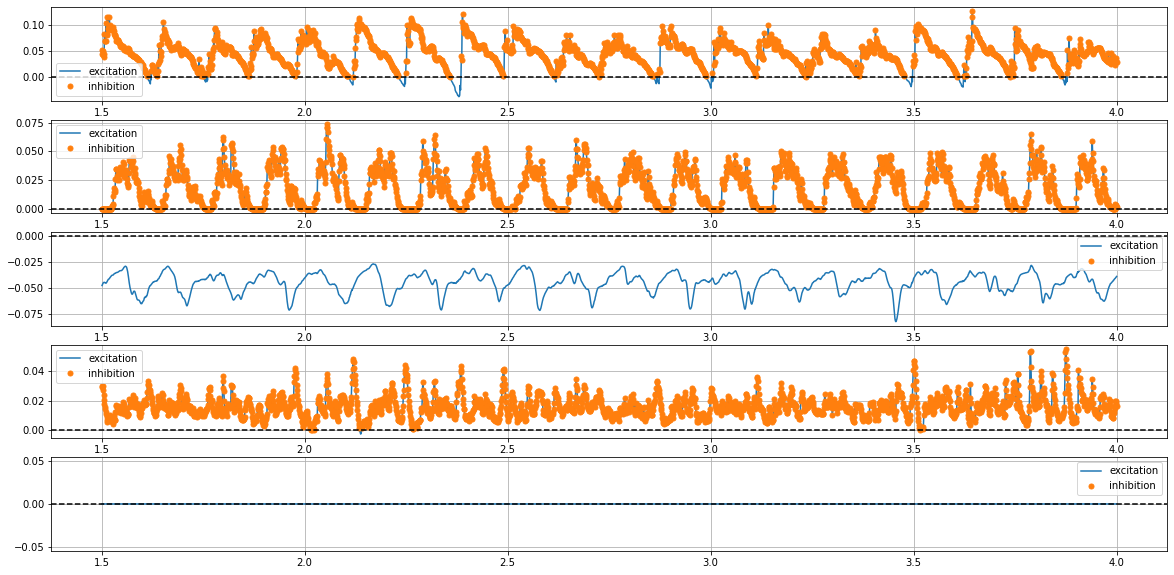

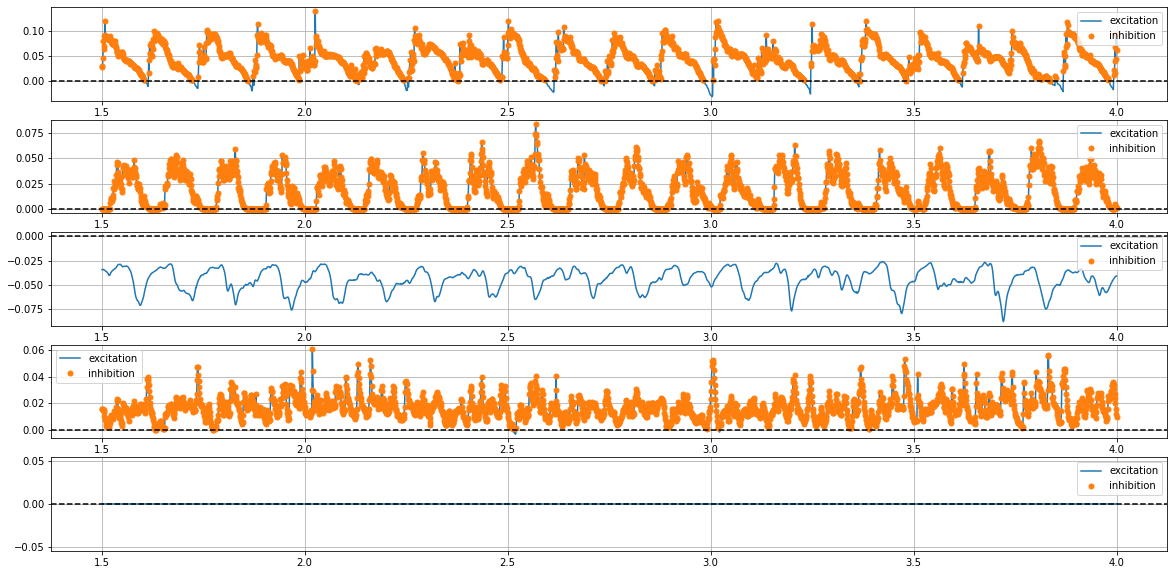

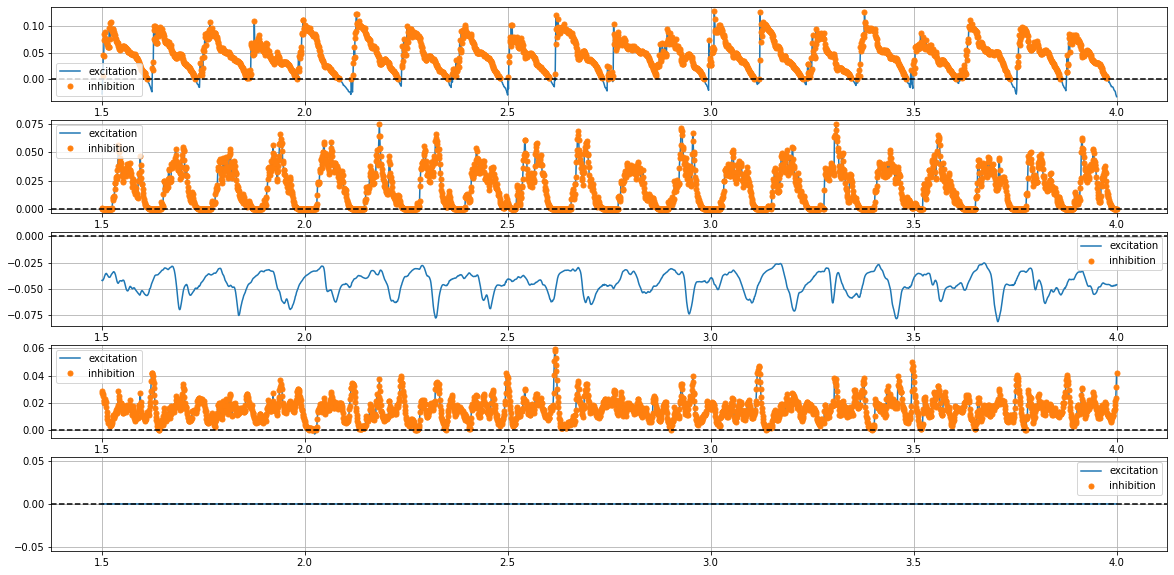

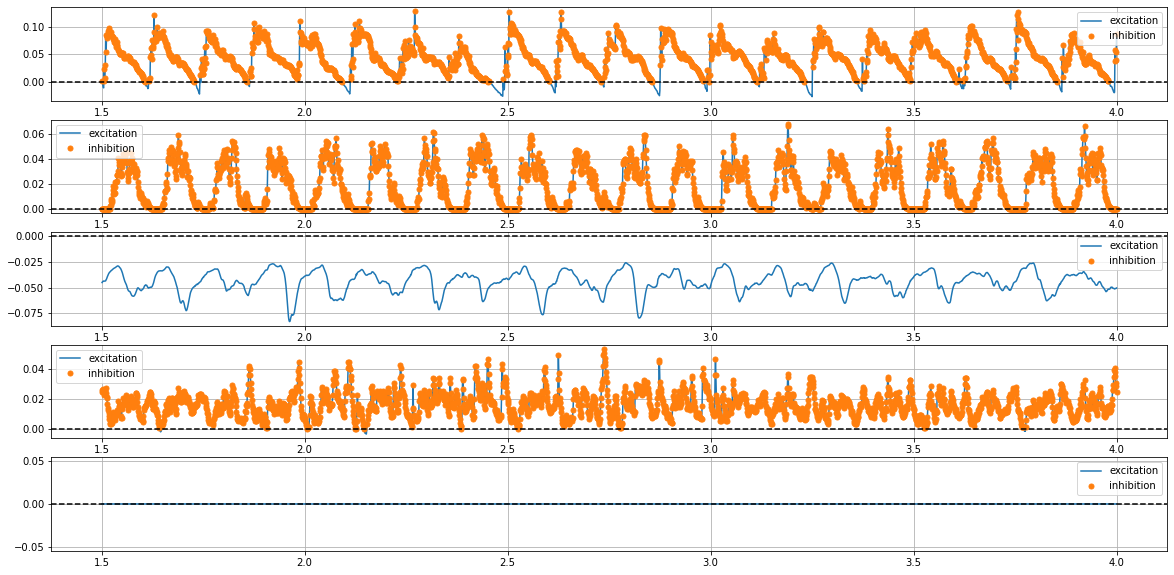

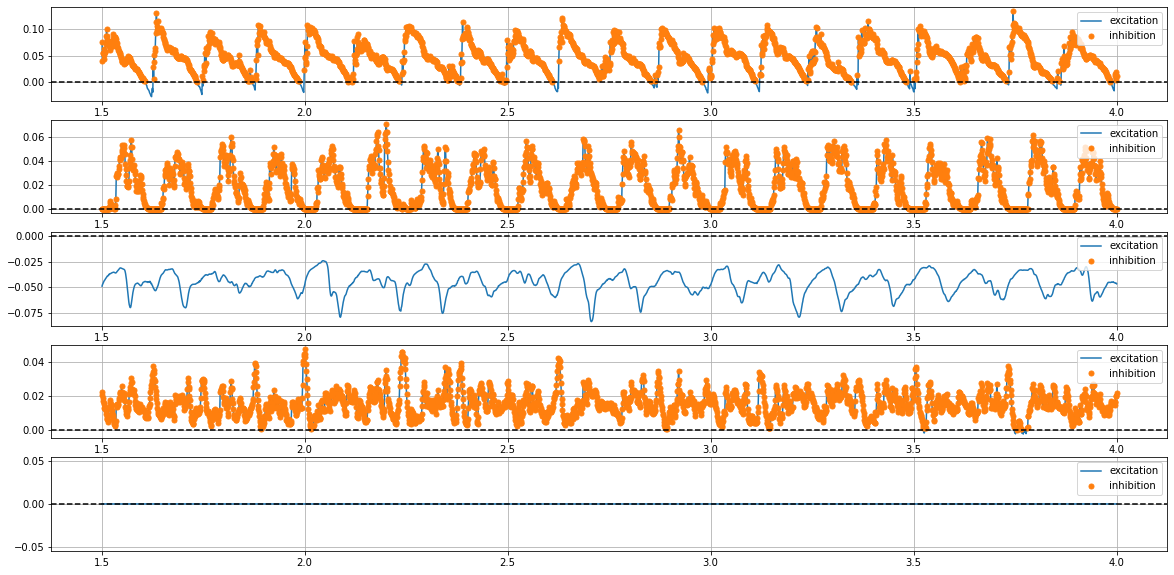

In [29]:
n = np.shape(data[key])[-1]
time = np.arange(0,dt*(n-1)+1e-4, dt) # por alguna razon esto va fatal
w = (time > 1.5)

separated = False
if separated:
    for i in range(0,21,5):
        fig, axs = plt.subplots(5,1,figsize=(20,10))
        for l,label in enumerate(labels):
            if len(currents[label])>0:
                for key in currents[label]:
                    if not "std" in key: 
                        axs[l].plot( time[w], data[key][i,w], label=key)
            else:
                axs[l].plot( time[w], np.zeros(n)[w],label="no synaptic currents")
            axs[l].legend(loc="best")
            axs[l].grid(True)
            axs[l].set_xlim([1.5,4.5])
total =True
if total:
    for i in range(0,21,5):
        fig, axs = plt.subplots(5,1,figsize=(20,10))
        for l,label in enumerate(labels):
            total_current = np.zeros(n)[w]
            if len(currents[label])>0:
                for key in currents[label]:
                    if not "std" in key: 
                        total_current += data[key][i,w]
            wexc = (total_current<0)
            winh = (total_current>0)
            axs[l].plot(time[w],total_current,label="excitation")
            axs[l].plot(time[w][winh],total_current[winh],'o',label="inhibition",markersize=5)
            axs[l].legend(loc="best")
            axs[l].grid(True)
            axs[l].axhline(0,linestyle="--",color="black")
            x = (total_current-total_current.mean())/total_current.std()
            fr, pxx  = scipy.signal.csd( x, x, fs=fs, window="hann", nfft=512, nperseg=200, noverlap=175)
            #coherence["currents"][i].append(pxx)
            #axs[l].set_xlim([1400,4500])cp
    #coherence["currents"] = np.array(coherence["currents"])

In [30]:
# computing the total currents

In [31]:
currents_overall = [ [] for i in range(21)]
coherence["currents"] =[ [] for i in range(21)]
total =True
fs = 1e3
for i in range(21):
    for l,label in enumerate(labels):
        total_current = np.zeros(n)[w]
        if len(currents[label])>0:
            for key in currents[label]:
                if not "std" in key: 
                    total_current += data[key][i,w]
        currents_overall[i].append(total_current)
        x = (total_current-total_current.mean())/total_current.std()
        frc, pxx  = scipy.signal.csd( x, x, fs=fs, window="hann", nfft=512, nperseg=200, noverlap=175)
        coherence["currents"][i].append(pxx)
        #axs[l].set_xlim([1400,4500])cp
coherence["currents"] = np.array(coherence["currents"])

<ipython-input-31-35bb4da7da29>:13: RuntimeWarning: invalid value encountered in true_divide
  x = (total_current-total_current.mean())/total_current.std()


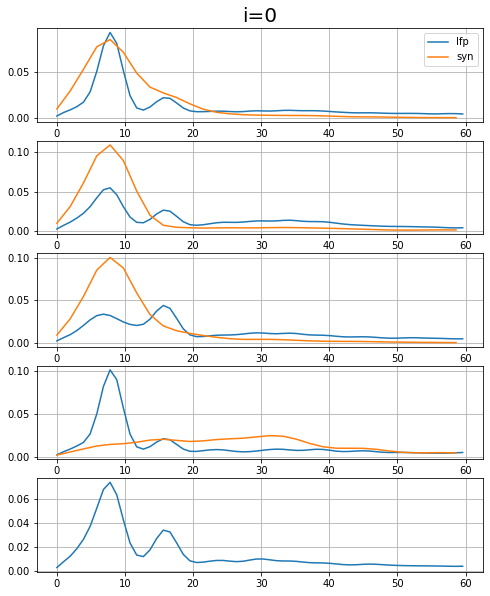

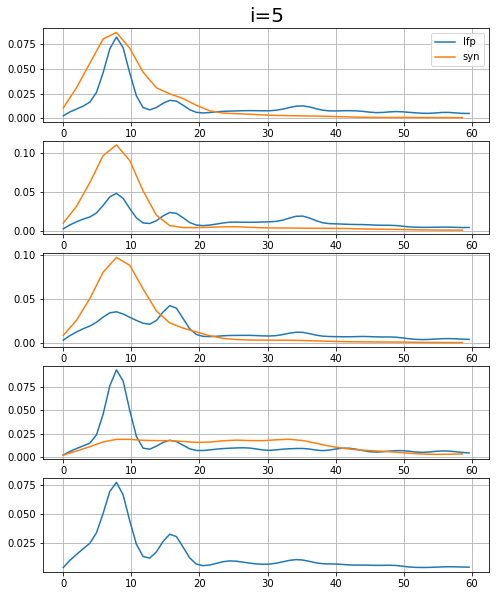

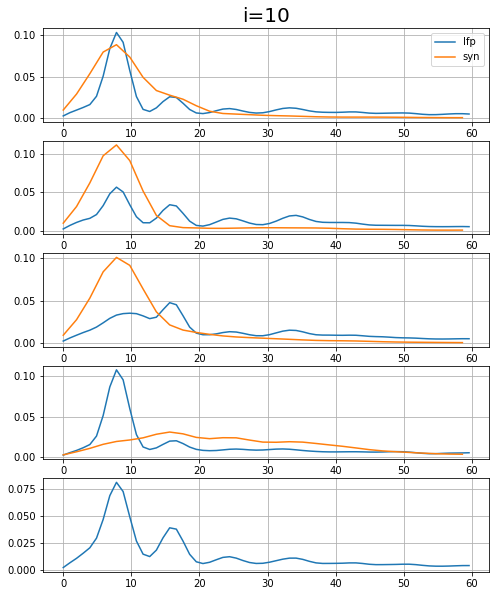

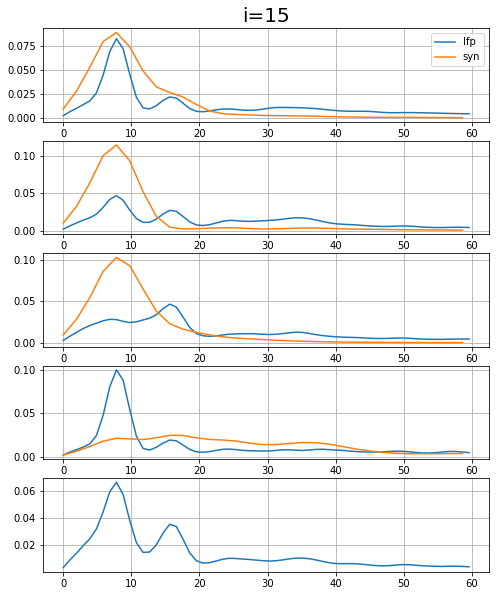

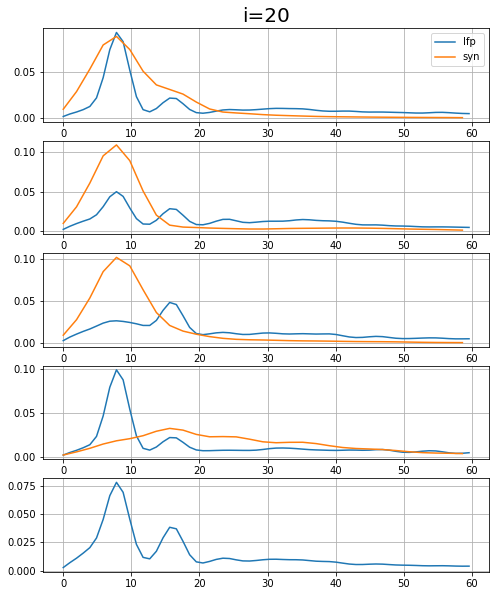

In [32]:
# comparative plot 
for i in range(0,21,5):
    fig, axs = plt.subplots(5,1,figsize=(8,10))
    for j in range(5):
        axs[j].plot(frl[frl<60],coherence["lfp"][i,j][frl<60],label="lfp")
        axs[j].plot(frc[frc<60],coherence["currents"][i,j][frc<60],label="syn")
        axs[j].grid(True)
    axs[0].set_title(f"i={i}",fontsize=20)
    axs[0].legend(loc="best")